In [160]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, linear_model, model_selection, metrics, pipeline
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("/data/insurance.csv")

In [3]:
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
target = "charges"
X = df.copy()
del X[target]
y = df[target]

In [92]:
X = pd.get_dummies(X, drop_first=False)

In [93]:
X.head()

,age,bmi,children,gender_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


In [12]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                        test_size = 0.3, random_state = 1)

In [56]:
np.random.seed(1)
np.random.random([10])

array([4.17022005e-01, 7.20324493e-01, 1.14374817e-04, 3.02332573e-01,
       1.46755891e-01, 9.23385948e-02, 1.86260211e-01, 3.45560727e-01,
       3.96767474e-01, 5.38816734e-01])

In [58]:
X_train.shape[0]/len(df)

0.6995515695067265

In [63]:
# Z = (X - X.mean()) / X.std() ... for each column 
# Goal is to have 0 mean and 1 standard deviation of each feature
scaler = preprocessing.StandardScaler()
scaler.fit(X_train) # it calculate X.mean() and X.std()
X_train_std = scaler.transform(X_train) # calculate Z score for each column
X_test_std = scaler.transform(X_test)
pd.DataFrame(X_train_std) 

,0,1,2,3,4,5,6,7
0,0.797152,-0.702114,-0.904002,0.976766,-0.509664,1.788102,-0.600387,-0.587220
1,-1.271085,-0.703758,-0.085679,-1.023787,-0.509664,-0.559252,-0.600387,1.702939
2,-0.985811,-0.733340,-0.904002,0.976766,-0.509664,-0.559252,-0.600387,-0.587220
3,0.797152,-0.414510,1.550967,-1.023787,-0.509664,-0.559252,1.665591,-0.587220
4,0.868471,1.482037,-0.085679,0.976766,-0.509664,-0.559252,-0.600387,1.702939
5,-0.985811,1.749098,-0.904002,-1.023787,-0.509664,-0.559252,-0.600387,-0.587220
6,-0.843174,0.117970,-0.904002,-1.023787,1.962076,-0.559252,-0.600387,1.702939
7,1.724293,-0.608437,-0.904002,-1.023787,1.962076,1.788102,-0.600387,-0.587220
8,-1.485041,0.525546,-0.904002,-1.023787,-0.509664,-0.559252,1.665591,-0.587220
9,-1.485041,-1.248563,-0.904002,0.976766,-0.509664,-0.559252,-0.600387,-0.587220


In [65]:
lr = linear_model.LinearRegression()
lr.fit(X_train_std, y_train) # Create the model

y_train_pred = lr.predict(X_train_std)
y_test_pred = lr.predict(X_test_std)

In [66]:
summary = pd.DataFrame({"actual": y_test, "predicted": y_test_pred})

In [67]:
summary["error"] = summary.actual - summary.predicted

In [68]:
summary.head()

,actual,predicted,error
559,1646.4297,4610.315541,-2963.885841
1087,11353.2276,12887.893880,-1534.666280
1020,8798.5930,12573.948752,-3775.355752
460,10381.4787,13197.836626,-2816.357926
802,2103.0800,629.337182,1473.742818


In [71]:
sse = np.sum(summary.error ** 2) # sum of squared error
sse

14778105453.509336

In [74]:
mse = sse / (len(y_test) - 1) # mean squared error

In [73]:
mse

36853130.80675645

In [75]:
rmse = np.sqrt(mse) # root mean squared error

In [76]:
rmse

6070.677952811898

In [77]:
y_baseline = np.mean(y_train)

In [79]:
sst = np.sum((y_baseline - y_test) ** 2) # sum of squared total

In [80]:
sse/sst 
# A. < 0, B. (0, 1) C. > 1.0

0.2594002695488974

In [81]:
r2 = 1 - sse/sst

In [82]:
r2

0.7405997304511026

In [88]:
target = "charges"
X = df.copy()
del X[target]
y = df[target]

X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                        test_size = 0.3, random_state = 1)

scaler = preprocessing.StandardScaler()
scaler.fit(X_train) # it calculate X.mean() and X.std()
X_train_std = scaler.transform(X_train) # calculate Z score for each column
X_test_std = scaler.transform(X_test)
pd.DataFrame(X_train_std) 

lr = linear_model.LinearRegression()
lr.fit(X_train_std, y_train) # Create the model

y_train_pred = lr.predict(X_train_std)
y_test_pred = lr.predict(X_test_std)

print("training r2: %f\ntest r2: %f\ntraining rmse: %f\ntest: rmse: %f" %(
    metrics.r2_score(y_train, y_train_pred),
    metrics.r2_score(y_test, y_test_pred),
    np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)),
    np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
))


training r2: 0.754556
test r2: 0.740599
training rmse: 6039.601871
test: rmse: 6063.122657


In [91]:
target = "charges"
X = df.copy()
del X[target]
y = df[target]

X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                        test_size = 0.3, random_state = 1)

est = pipeline.Pipeline([
    ("scaler", preprocessing.StandardScaler()),
    ("lr", linear_model.LinearRegression())
])
est.fit(X_train, y_train)

y_train_pred = est.predict(X_train)
y_test_pred = est.predict(X_test)

print("training r2: %f\ntest r2: %f\ntraining rmse: %f\ntest: rmse: %f" %(
    metrics.r2_score(y_train, y_train_pred),
    metrics.r2_score(y_test, y_test_pred),
    np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)),
    np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
))

training r2: 0.754556
test r2: 0.740599
training rmse: 6039.601871
test: rmse: 6063.122657


In [98]:
lr = est.steps[-1][-1]

In [99]:
lr.coef_

array([3528.98273114, 1961.65520818,  421.55016415, -141.35911014,
       9733.78688309, -129.54588605, -414.54148288, -379.09534369])

In [100]:
lr.intercept_

13276.698553898505

In [101]:
pd.DataFrame({"feature": X.columns, "coefficient": lr.coef_})

,coefficient,feature
0,3528.982731,age
1,1961.655208,bmi
2,421.550164,children
3,-141.359110,gender_male
4,9733.786883,smoker_yes
5,-129.545886,region_northwest
6,-414.541483,region_southeast
7,-379.095344,region_southwest


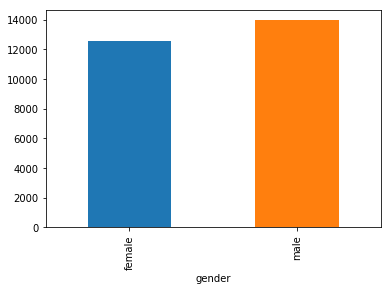

In [104]:
df.groupby("gender").charges.mean().plot.bar()

In [131]:
target = "charges"
X = df.copy()
del X[target]
y = np.log(df[target])

# Derived features
X["age_group"] = np.where(df.age>60, "Senior", "Other")
X["bmi.high"] = np.where(df.bmi>30, "yes", "no")

X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                        test_size = 0.3, random_state = 1)

est = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=2, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("lr", linear_model.LinearRegression())
])
est.fit(X_train, y_train)

y_train_pred = est.predict(X_train)
y_test_pred = est.predict(X_test)

print("training r2: %f\ntest r2: %f\ntraining rmse: %f\ntest: rmse: %f" %(
    metrics.r2_score(y_train, y_train_pred),
    metrics.r2_score(y_test, y_test_pred),
    np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)),
    np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
))

training r2: 0.832896
test r2: 0.868029
training rmse: 0.376093
test: rmse: 0.333185


In [106]:
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [112]:
X.head()

,age,bmi,children,gender_male,smoker_yes,region_northwest,region_southeast,region_southwest,age_group_Senior,bmi.high_yes
0,19,27.900,0,0,1,0,0,1,0,0
1,18,33.770,1,1,0,0,1,0,0,1
2,28,33.000,3,1,0,0,1,0,0,1
3,33,22.705,0,1,0,1,0,0,0,0
4,32,28.880,0,1,0,1,0,0,0,0


In [121]:
a = np.random.randint(-3, 5, size = (4, 3) )
a

array([[ 0, -3, -3],
       [ 2,  2,  3],
       [ 1,  2,  3],
       [-1,  1,  0]])

In [125]:
poly = preprocessing.PolynomialFeatures(degree=3, include_bias=False)
poly.fit_transform(a)

array([[  0.,  -3.,  -3.,   0.,  -0.,  -0.,   9.,   9.,   9.,   0.,  -0.,
         -0.,   0.,   0.,   0., -27., -27., -27., -27.],
       [  2.,   2.,   3.,   4.,   4.,   6.,   4.,   6.,   9.,   8.,   8.,
         12.,   8.,  12.,  18.,   8.,  12.,  18.,  27.],
       [  1.,   2.,   3.,   1.,   2.,   3.,   4.,   6.,   9.,   1.,   2.,
          3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.],
       [ -1.,   1.,   0.,   1.,  -1.,  -0.,   1.,   0.,   0.,  -1.,   1.,
          0.,  -1.,  -0.,  -0.,   1.,   0.,   0.,   0.]])

In [153]:
target = "charges"
X = df.copy()
del X[target]
y = np.log(df[target])

# Derived features
X["age_group"] = np.where(df.age>60, "Senior", "Other")
X["bmi.high"] = np.where(df.bmi>30, "yes", "no")

X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                        test_size = 0.3, random_state = 1)




est = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=2, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("lr", linear_model.SGDRegressor(penalty="l1", alpha=0.1, random_state=1, max_iter=1000))
])
est.fit(X_train, y_train)

y_train_pred = est.predict(X_train)
y_test_pred = est.predict(X_test)

print("training r2: %f\ntest r2: %f\ntraining rmse: %f\ntest: rmse: %f" %(
    metrics.r2_score(y_train, y_train_pred),
    metrics.r2_score(y_test, y_test_pred),
    np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)),
    np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
))

print(est.steps[-1][-1].coef_)

training r2: 0.731565
test r2: 0.749078
training rmse: 0.476674
test: rmse: 0.459426
[0.37831081 0.         0.01767921 0.         0.0495137  0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.40484811
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.0495137  0.         0.         0.
 0.         0.03979661 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]


In [155]:
alphas = np.linspace(0, 0.1, 20)
alphas

array([0.        , 0.00526316, 0.01052632, 0.01578947, 0.02105263,
       0.02631579, 0.03157895, 0.03684211, 0.04210526, 0.04736842,
       0.05263158, 0.05789474, 0.06315789, 0.06842105, 0.07368421,
       0.07894737, 0.08421053, 0.08947368, 0.09473684, 0.1       ])

In [ ]:
alphas = np.linspace(0, 1.0, 20)
weights = []
for alpha in alphas:
    est = pipeline.Pipeline([
        ("poly", preprocessing.PolynomialFeatures(degree=2, include_bias=False)),
        ("scaler", preprocessing.StandardScaler()),
        ("lr", linear_model.SGDRegressor(penalty="l1", alpha=alpha, random_state=1, max_iter=1000))
    ])
    est.fit(X_train, y_train)
    weights.append(est.steps[-1][-1].coef_)

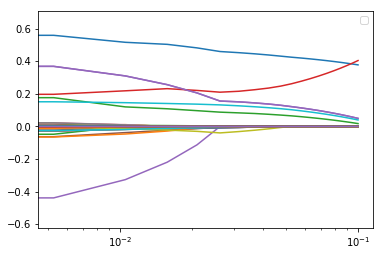

In [166]:
plt.plot(alphas, weights)
plt.legend([])
plt.xscale("log")

In [177]:
price = pd.read_csv("https://raw.githubusercontent.com/abulbasar/data/master/kaggle-houseprice/data_combined_cleaned.csv")

In [178]:
price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalesPrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000.0


In [179]:
pd.options.display.max_columns = 1000

In [180]:
price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalesPrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000.0


In [181]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2919 non-null object
LotFrontage      2919 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2919 non-null object
Exterior2nd      2919 non

In [182]:
price_clean = price[~price.SalesPrice.isnull()]

In [183]:
price_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 80 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

In [184]:
del price_clean["Id"]

In [185]:
price_clean.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalesPrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000.0


Try to the best model based on the rmse score.

A. Try Lasso model (l1 penaly)
B. Try Ridge model (L2 penalty)
C. Try Elastic Net model (L1_l2 penalty)

Which algorithm and hyper parameters gives the best result?
